Use this notebook to run and analyze the results from the xbeach model.

* Try to match the wave heights first. Also need to be checking the depth averaged velocity but that isn't measured at that many locations
* Try to get a general fit with this model not an exact one


Author: WaveHello

Date: 07/15/2024

In [25]:
# import default modules
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import math

# Set global constants
PI = np.pi

# method to import xbtools with try routine
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(r"C:\ERDC\xbeach-toolbox")

In [26]:
from xbTools.xbeachpost import XBeachModelAnalysis
from xbTools.general.executing_runs import generate_batch_script, run_batch_script

In [27]:
# Functions 
def get_script_directory():
    try:
        # This will work if the script is run directly
        script_path = os.path.abspath(__file__)
    except NameError:
        # This will work in an interactive environment like Jupyter
        script_path = os.path.abspath('')
    
    return script_path

In [28]:
# Import the classes that represent the runs
# Add the library to the path
sys.path.append(r"C:\ERDC\BarSed")

# Import the library modules

from lib.data_classes.Run import Run

In [29]:
# Import the raw bathymetry
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed"

# Set the information needed for specifying the run
# Run number
run_number = "002"

# Run id
run_id = f"RUN{run_number}"

# Mat file for the first run
run_name = r"{}.mat".format(run_id)

# Name of the folder containing the wave data
WG_data_folder_name = r"WG" 

# Path to where I'm storing the bathymetry data
WG_data_path = os.path.join(barsed_data_path, WG_data_folder_name)

# Path to the selected wave gauge data
wave_data_path = os.path.join(WG_data_path, run_name)

print(f"Run{run_number} wave mat file path: {wave_data_path}")

Run_data = Run(id = run_id, wave_file_path=wave_data_path,
              ADV_file_path = None)

print(Run_data)
print()
Run_data.load_wave_data()


Run002 wave mat file path: D:\ERDC\BarSed\WG\RUN002.mat
id: RUN002
Start Date: None
Wave Data File path: D:\ERDC\BarSed\WG\RUN002.mat
Num pressure gagues: None
Num advs: None

New Number of 17 wave gauges


In [30]:
# Construct the wse elevation as mesured by the wave gauges 
# (doesn't include wave maker)
Run_data.construct_wave_gauge_wse()

# Make an array of all the wave gauge locations
Run_data.get_wave_gauge_locations()

# Construct the elevation of the flume as measured by the wave gauges and 
# the wave maker
Run_data.construct_flume_wse()

# get the lab wave gauge locations
lab_xdir = Run

# Don't include the wave maker
# Get the lab wave gauge flume wse
lab_wse = Run_data.flume_wse[:, 1:]
lab_wg_locs = Run_data.flume_wse_locs[0, 1:]


In [31]:
print(lab_wg_locs)

[17.728 25.037 32.342 35.895 39.556 43.215 46.876 50.53  54.192 57.85
 61.509 65.205 68.759 72.405 76.068 79.738 83.385]


In [32]:
# Get the script directory
# Get the folder of the current script
script_dir = get_script_directory()

# Generate the model directory
model_dir = os.path.join(script_dir, f"")

# Need to batch file path
batch_file_name = "run_model.bat"
batch_file_path = os.path.join(model_dir, batch_file_name)

# Run the batch file
run_batch_script(batch_file_path, flag_print_Blog = False)



Batch file 'c:\ERDC\BarSed_xBeach_models\Solitary_Wave_Models\Run_002_nonhq3d\run_model.bat' executed successfully.


In [33]:
# Store the xbeach data
results = XBeachModelAnalysis(fname = "foo", 
                              model_path=model_dir)

In [34]:
results.set_save_fig(False)
results.set_plot_localcoords(False)
results.set_plot_km_coords(False)

In [35]:
results.load_modeloutput("u")

loading variable u from file


In [36]:
results.var.keys()
results.load_modeloutput("zs")
results.load_modeloutput("zb")

loading variable zs from file
loading variable zb from file


In [37]:
model_time = results.var["globaltime"]

left_boundary_zs =  model_zs = results.var["zs"][:, 0, 0]


In [38]:
model_xdir = results.var["globalx"][0, :]
print(model_xdir)

[-0.302  0.198  0.698  1.198  1.698  2.198  2.698  3.198  3.698  4.198
  4.698  5.198  5.698  6.198  6.698  7.198  7.698  8.198  8.698  9.198
  9.698 10.198 10.698 11.198 11.698 12.198 12.698 13.198 13.698 14.198
 14.698 15.198 15.698 16.198 16.698 17.198 17.698 18.198 18.698 19.198
 19.698 20.198 20.698 21.198 21.698 22.198 22.698 23.198 23.698 24.198
 24.698 25.198 25.698 26.198 26.698 27.198 27.698 28.198 28.698 29.198
 29.698 30.198 30.698 31.198 31.698 32.198 32.698 33.198 33.698 34.198
 34.698 35.198 35.698 36.198 36.698 37.198 37.698 38.198 38.698 39.198
 39.698 40.198 40.698 41.198 41.698 42.198 42.698 43.198 43.698 44.198
 44.698 45.198 45.698 46.198 46.698 47.198 47.698 48.198 48.698 49.198
 49.698 50.198 50.698 51.198 51.698 52.198 52.698 53.198 53.698 54.198
 54.698 55.198 55.698 56.198 56.698 57.198 57.698 58.198 58.698 59.198
 59.698 60.198 60.698 61.198 61.698 62.198 62.698 63.198 63.698 64.198
 64.698 65.198 65.698 66.198 66.698 67.198 67.698 68.198 68.698 69.198
 69.69

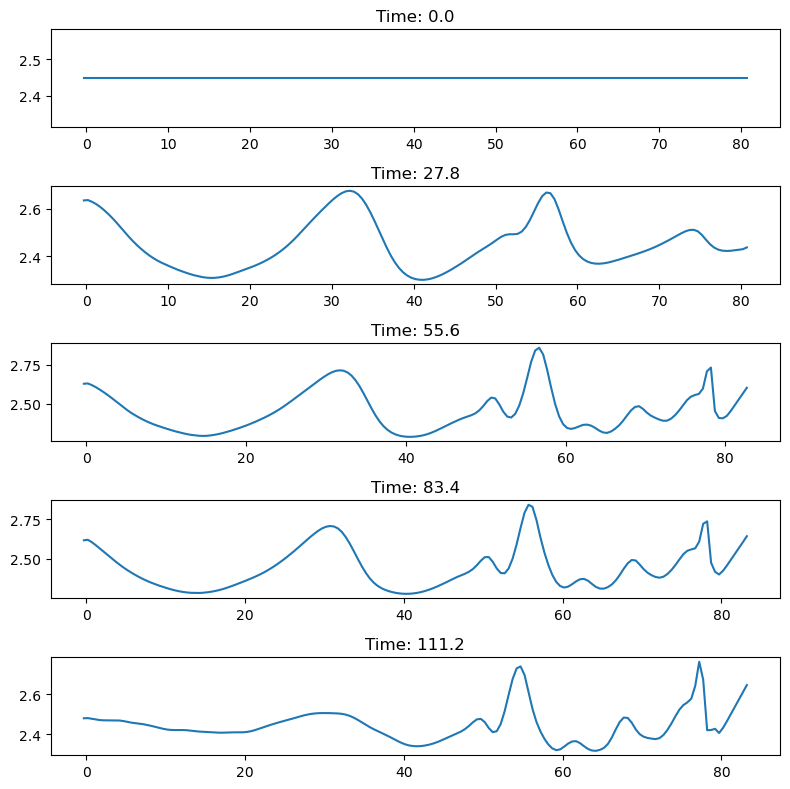

In [39]:
nrows = 5
fig, axs = plt.subplots(nrows = nrows, ncols = 1, figsize = (8,nrows * (1.6)))

# Convert the axs to an array so I can index it, helps if I add more subplots
axs = np.atleast_1d(axs)

# Calc an equal step size to fill the plots
step = math.ceil(len(model_time) / nrows)

# Get the time indices of the model_time arr to plot the data at
time_indices = [val for val in range(0, len(model_time), step)]

# Get the location of the xgrid points
model_xdir = results.var["globalx"][0, :]

# Plot each of surface vs. plots
for i, time_index in enumerate(time_indices):
    # Get the plot time
    time = model_time[time_index]

    # Set the surface elevation at the selected time
    model_zs = results.var["zs"][time_index, 0, :]

    # Plot the surface elevation w/ time
    axs[i].plot(model_xdir, model_zs, label = "Model")
    
    # Plot the measured data
    axs[i].plot()

    if True:
        axs[i].set_title(f"Time: {time}")
    if False:
        # Format the plot
        axs[i].set_xlabel("Time (s)")
        axs[i].set_ylabel("Surface elevation (m)")

plt.tight_layout()
plt.show()
# Compare it against the lab data

In [40]:
# Load the wave maker data
df_wave_maker = pd.read_csv("wave_maker.csv")
display(df_wave_maker)

# Get the time of lab measurements
lab_time = df_wave_maker["time"]

,time,location,wse
0,0.000000,0.000135,2.438837
1,0.009998,0.000348,2.439674
2,0.019996,0.000277,2.440125
3,0.029994,0.000206,2.440834
4,0.040002,0.000206,2.441865
...,...,...,...
13894,138.940003,0.000206,2.437419
13895,138.950001,0.000490,2.438837
13896,138.959999,0.000348,2.440125
13897,138.969997,0.000419,2.441994


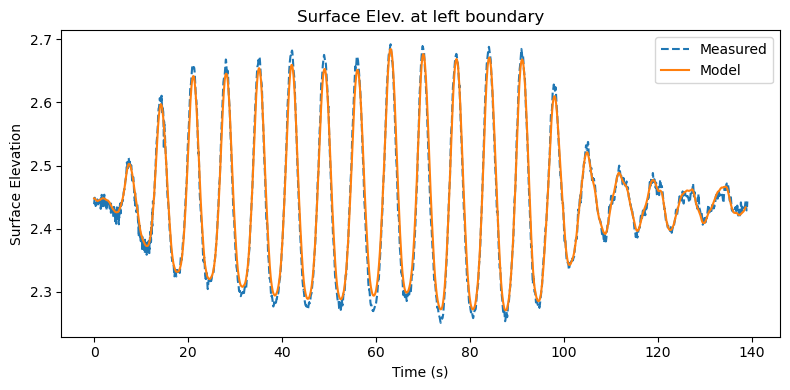

In [41]:
# Plot the data at the prescribed boundary
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))

axs = np.atleast_1d(axs)


i = 0
axs[i].plot(lab_time, df_wave_maker["wse"], 
            linestyle = "dashed", label = "Measured")
axs[i].plot(model_time, left_boundary_zs, label = "Model")

# Format the plot
axs[i].legend()
axs[i].set_title("Surface Elev. at left boundary")
axs[i].set_xlabel("Time (s)")
axs[i].set_ylabel("Surface Elevation")

plt.tight_layout()
plt.show()

In [42]:
lab_time

0          0.000000
1          0.009998
2          0.019996
3          0.029994
4          0.040002
            ...    
13894    138.940003
13895    138.950001
13896    138.959999
13897    138.969997
13898    138.979995
Name: time, Length: 13899, dtype: float64

In [43]:
def find_closest(array, target):
    # Convert array to a NumPy array if it is not already
    array = np.array(array)
    
    # Compute the absolute differences between each element and the target
    diff = np.abs(array - target)
    
    # Find the index of the minimum difference
    idx = diff.argmin()
    
    # Get the value at that index
    closest_value = array[idx]
    
    return closest_value, idx

In [44]:
zs0 = results.var["zs"][0, 0, 0]
zb  = results.var["zb"]

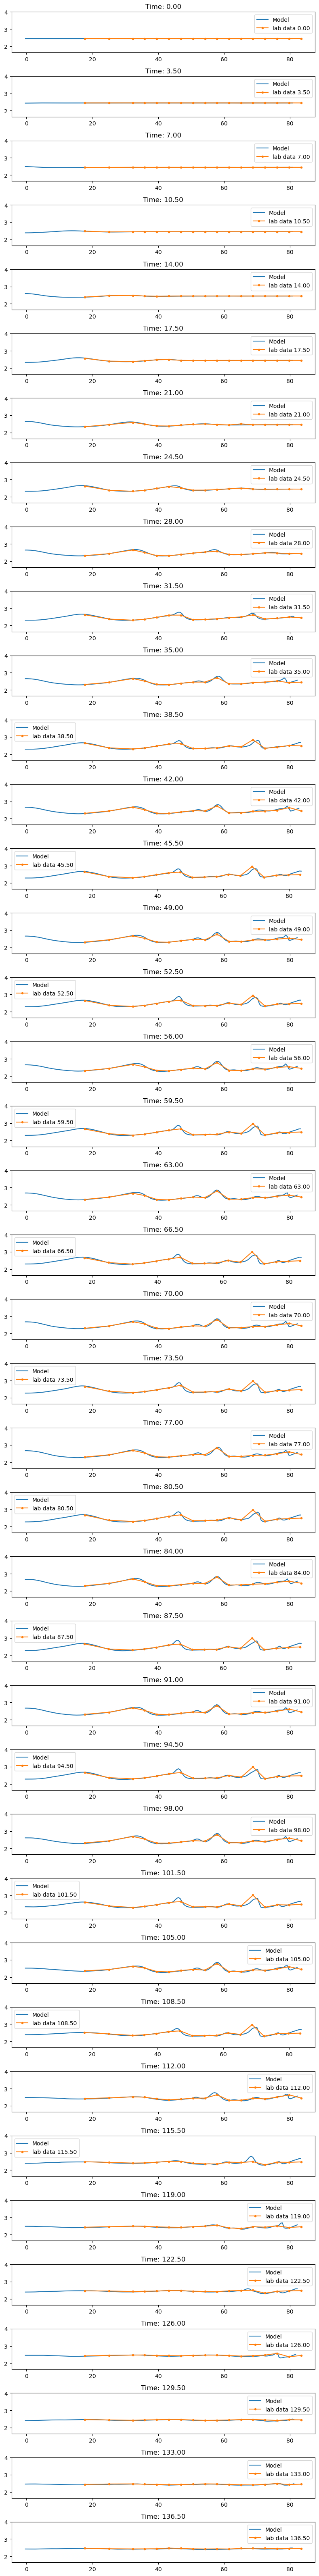

In [45]:
nrows = 40
fig, axs = plt.subplots(nrows = nrows, ncols = 1, figsize = (8,nrows * (1.6)))

# Convert the axs to an array so I can index it, helps if I add more subplots
axs = np.atleast_1d(axs)

# Calc an equal step size to fill the plots
step = math.ceil(len(model_time) / nrows)

# Get the time indices of the model_time arr to plot the data at
time_indices = [val for val in range(0, len(model_time), step)]

# Get the location of the xgrid points
model_xdir = results.var["globalx"][0, :]

# Plot each of surface vs. plots
for i, time_index in enumerate(time_indices):
    # Get the plot time
    model_t = model_time[time_index]

    # Get the closest lab time
    lab_t, lab_index = find_closest(lab_time, model_t)

    # Set the surface elevation at the selected time
    model_zs = results.var["zs"][time_index, 0, :]

    # Plot the surface elevation w/ time
    axs[i].plot(model_xdir, model_zs, label = "Model")

    # Plot the measured data
    axs[i].plot(lab_wg_locs, lab_wse[lab_index, :] + zs0, 
                label = "lab data {:.2f}".format(lab_t),
                marker = ".")
    
    # Plot the bathymtry
    
    # Format the plot
    if False:
        axs[i].plot(model_xdir, zb[time_index, 0, :], label = "bathy")
    else:
        # Select only the waves
        axs[i].set_ylim(zs0-0.8, 4)

    axs[i].legend()
    if True:
        axs[i].set_title("Time: {:.2f}".format(model_t))

    if False:
        # Format the plot
        axs[i].set_xlabel("Time (s)")
        axs[i].set_ylabel("Surface elevation (m)")

plt.tight_layout()
plt.show()
# Compare it against the lab data

In [46]:
results.load_modeloutput("u")
u = results.var["u"]

Variable already loaded


In [47]:
df = pd.read_csv("boun_U.bcf", sep = "\\s+", skiprows=3, header=None, names=["t", "zs", "u"])

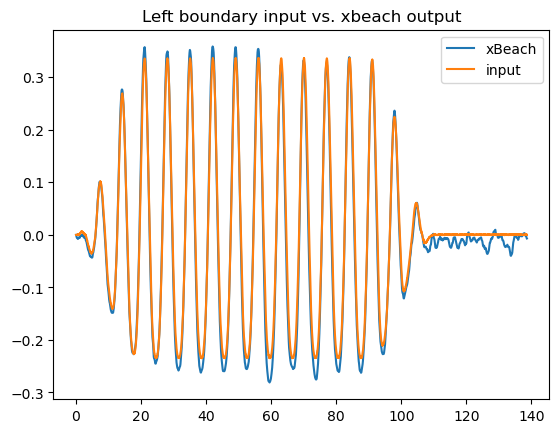

In [48]:
plt.plot(model_time, u[:, 0, 0], label = "xBeach")
plt.plot(df["t"], df["u"], label = "input")
plt.title("Left boundary input vs. xbeach output")
plt.legend()
plt.show()